# Importing Libraries

In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [222]:
data_training=pd.read_csv("nse_training.csv")
df1=data_training

In [223]:
data_test=pd.read_csv("nse_test.csv")
data_test=df2

# Analysing the Patterns of the training Dataset

In [224]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


In [225]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1481 non-null   object 
 1   Open       1475 non-null   float64
 2   High       1475 non-null   float64
 3   Low        1475 non-null   float64
 4   Close      1475 non-null   float64
 5   Adj Close  1475 non-null   float64
 6   Volume     1475 non-null   float64
dtypes: float64(6), object(1)
memory usage: 81.1+ KB


6 float datatype column and 1 object datatype column present in the dataset.

In [226]:
# Checking shape
df1.shape

(1481, 7)

1481 rows and 7 columns present in the dataset.

In [227]:
# Checking Null values
df1.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

Null values are present most of the columns.

In [228]:
# Handling Null values
df1['Open']=df1['Open'].fillna(np.mean(df1['Open']))
df1['High']=df1['High'].fillna(np.mean(df1['High']))
df1['Low']=df1['Low'].fillna(np.mean(df1['Low']))
df1['Close']=df1['Close'].fillna(np.mean(df1['Close']))
df1['Adj Close']=df1['Adj Close'].fillna(np.mean(df1['Adj Close']))
df1['Volume']=df1['Volume'].fillna(np.mean(df1['Volume']))





In [229]:
# Handling the Date column
df1["Date"] = pd.to_datetime(df1["Date"])
df1["Year"]= df1["Date"].dt.year
df1["Month"]= df1["Date"].dt.month
df1["Day"]= df1["Date"].dt.day



In [230]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0,2016,1,4
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0,2016,1,5
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0,2016,1,6
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0,2016,1,7
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0,2016,1,8


So now we have extracted the Year, Month and Day from the Date Column.


In [231]:
# Deleting Date Column
del df1['Date']

In [232]:
df1.shape

(1481, 9)

Now 1481 rows and 9 columns present in the Dataset.

# EDA Nominal data

In [233]:
df1.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year', 'Month',
       'Day'],
      dtype='object')

2020    251
2017    248
2021    248
2018    246
2016    245
2019    243
Name: Year, dtype: int64


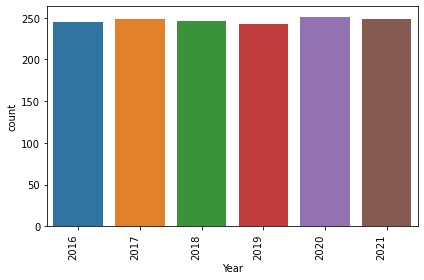

In [234]:
ax=sns.countplot(x='Year',data=df1)
print(df1['Year'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()

Year is in range from 2016 to 2021 and figure is showing that there is not much noicable difference betweeen them.

7     130
1     128
12    128
5     127
6     127
8     126
11    123
3     121
9     121
10    120
2     117
4     113
Name: Month, dtype: int64


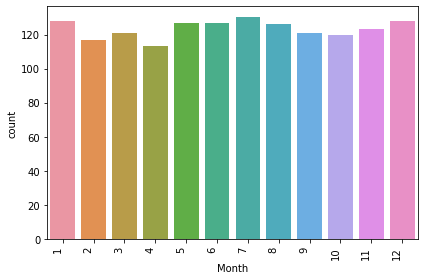

In [235]:
ax=sns.countplot(x='Month',data=df1)
print(df1['Month'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()

According to the figure there is not much differnce in any of the month.

# EDA Continuous Data

<AxesSubplot:xlabel='Open', ylabel='Density'>

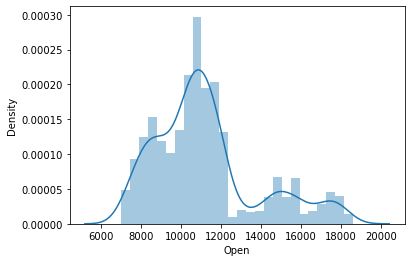

In [236]:
sns.distplot(df1['Open'])

Open is in range from 6000 to 20000 and most of the amount is in range from 7000 to 13000 approx.

<AxesSubplot:xlabel='High', ylabel='Density'>

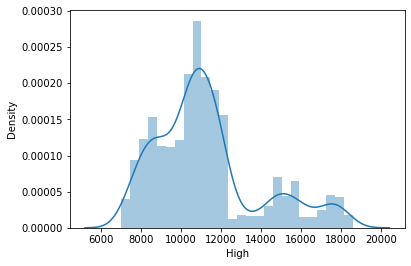

In [237]:
sns.distplot(df1['High'])

Most of the amount in High column is in range from 7000 to 13000 and lesser amount is in range from 14000 to 19000 approx.

<AxesSubplot:xlabel='Low', ylabel='Density'>

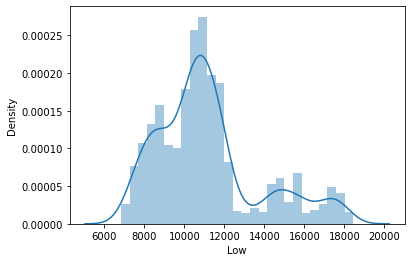

In [238]:
sns.distplot(df1['Low'])

Most of the amount in Low column is in range from 7000 to 13000 and lesser amount is in range from 14000 to 19000 approx.

<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

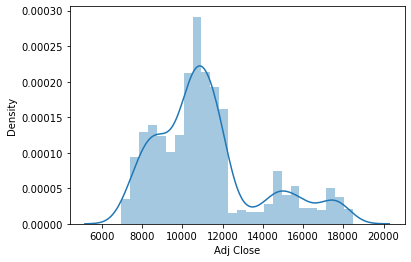

In [239]:
sns.distplot(df1['Adj Close'])

Most of the amount in Adj Close column is in range from 7000 to 13000 and lesser amount is in range from 14000 to 19000 approx.

# Statistical Summary

In [240]:
df1.describe()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
count,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1.481000e+03,1481.000000,1481.000000,1481.000000
mean,11190.630103,11243.279798,11114.862019,11180.224847,11180.224847,3.672148e+05,2018.507090,6.529372,15.769075
std,2600.117834,2608.346006,2582.932225,2596.726103,2596.726103,2.272977e+05,1.709705,3.453452,8.798150
min,7023.649902,7034.200195,6825.799805,6970.600098,6970.600098,0.000000e+00,2016.000000,1.000000,1.000000
25%,9374.549805,9414.750000,9298.400391,9342.150391,9342.150391,1.957000e+05,2017.000000,4.000000,8.000000
50%,10784.500000,10819.400391,10724.049805,10772.049805,10772.049805,2.923000e+05,2019.000000,7.000000,16.000000
75%,11922.450195,11968.099609,11843.349609,11913.450195,11913.450195,5.083000e+05,2020.000000,10.000000,23.000000
max,18602.349609,18604.449219,18445.300781,18477.050781,18477.050781,1.811000e+06,2021.000000,12.000000,31.000000


Number of values is same in all the columns except volume.

Not much difference between mean and median(50%)

Not much difference between 75% and max.

# Checking Correlations

<AxesSubplot:>

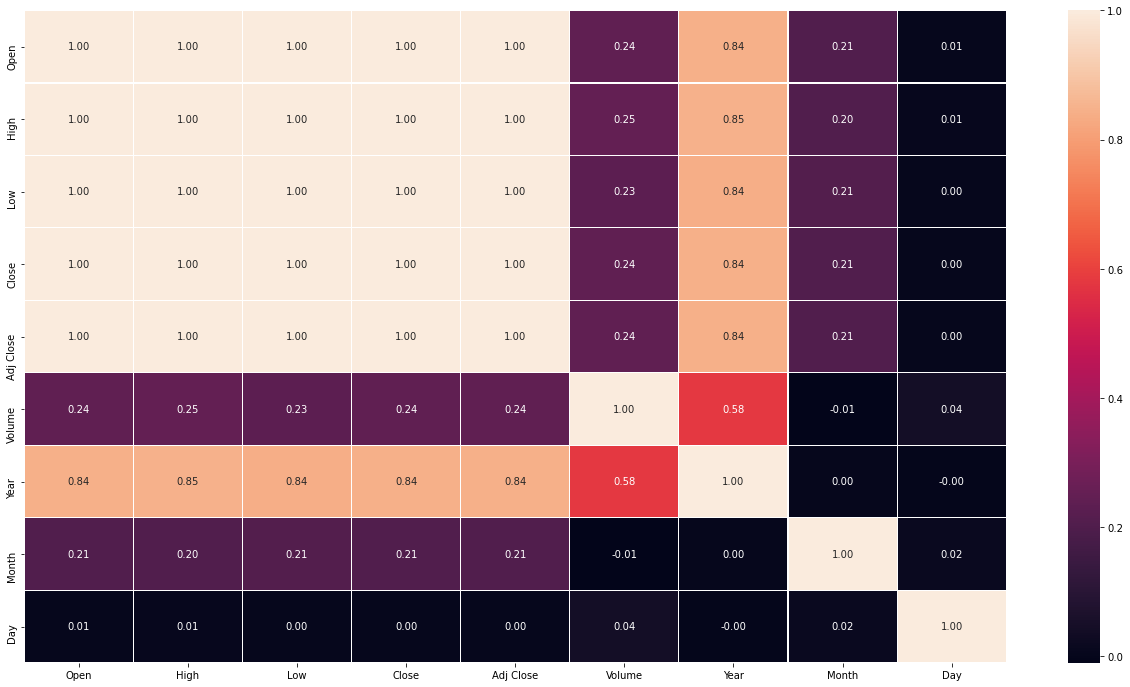

In [241]:
plt.figure(figsize=(22,12))
sns.heatmap(df1.corr(),annot=True,linewidths =0.1,fmt='0.2f')

Most of the column is negatively correlated with the column volume.

Year column is positively correlated with most of the coulmn.

# Now we need only 2 columns for model building that is open and close

In [242]:
training_set = df1.iloc[:, 1:2].values

# Feature Scaling

In [243]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating Data with TimeSteps

In [244]:
training_set.shape

(1481, 1)

In [267]:
X_train = []
y_train = []
for i in range(60, 1481):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Using LSTM for model building

In [268]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [269]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.25))

regressor.add(Dense(units = 1))

In [270]:
regressor.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_31 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_16 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_32 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_17 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_33 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_18 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_34 (LSTM)              (None, 50)               

In [278]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history=regressor.fit(X_train, y_train, epochs = 40, batch_size = 32, validation_split=0.1)

Epoch 1/40
40/40 [==============================] - 110s 304ms/step - loss: 0.0184 - val_loss: 0.0028
Epoch 2/40
40/40 [==============================] - 7s 165ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 3/40
40/40 [==============================] - 6s 154ms/step - loss: 0.0029 - val_loss: 0.0014
Epoch 4/40
40/40 [==============================] - 6s 141ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 5/40
40/40 [==============================] - 6s 152ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 6/40
40/40 [==============================] - 6s 156ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 7/40
40/40 [==============================] - 6s 161ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 8/40
40/40 [==============================] - 7s 173ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 9/40
40/40 [==============================] - 6s 139ms/step - loss: 0.0027 - val_loss: 0.0056
Epoch 10/40
40/40 [==============================] - 6s 158ms/step - loss: 0.0021 - val_loss: 0.00

# Plotting the Graph

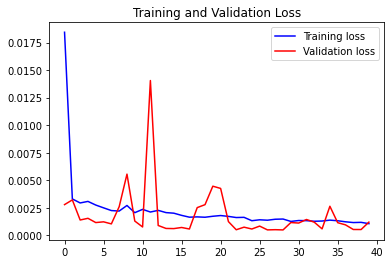

In [279]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


# Prediction on Test data

In [280]:
test_data = df2.iloc[:, 1:2].values

# Applying Inverse Transfromation for obtaining the result

In [281]:
dataset_total = pd.concat((df1['Open'], df2['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(df2) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = regressor.predict(X_test)
predicted = sc.inverse_transform(predicted)

In [282]:
predicted

array([[16740.125],
       [16790.723],
       [16862.56 ],
       [16957.617],
       [17069.7  ],
       [17188.814],
       [17307.06 ],
       [17419.19 ],
       [17525.154],
       [17626.127],
       [17718.674],
       [17799.697],
       [17869.31 ],
       [17921.568],
       [17946.684],
       [17932.096]], dtype=float32)

In [283]:
y_test

array([4.83106008e-03, 4.58580916e-03, 4.77164561e-03, ...,
       9.22142463e-02, 1.11595803e-03, 6.62617338e-06])

# Now Plotting the Results on Graph

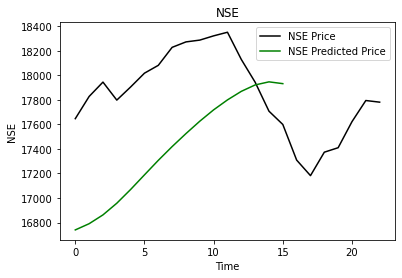

In [284]:
plt.plot(test_data, color = 'black', label = 'NSE Price')
plt.plot(predicted, color = 'green', label = 'NSE Predicted Price')
plt.title('NSE')
plt.xlabel('Time')
plt.ylabel('NSE')
plt.legend()
plt.show()

The above plot shows that NSE will increase stable and  model prediction also shows that the price will increase.

​